In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import fitsio as ft

random = ft.read('/B/Shared/Shadab/FA_LSS/FA_EZmock_desi_ELG_v0_rand_01.fits')
data = ft.read('/B/Shared/Shadab/FA_LSS/FA_EZmock_desi_ELG_v0_15.fits')
print('Random Columns : ', random.dtype.names)
print('Data Columns : ', data.dtype.names)


# print the percentiles
prcn = [0, 25, 50, 75, 100]
for name in ['Z', 'Z_COSMO', 'DZ_RSD']:
    print('{} 0-25-50-75-100% : {}'.format(name, np.percentile(data[name], prcn)))
    
print('{}% have negative Z (Z=-1)'.format(np.mean(data['Z']<0.0)))
            
      
# plot Z or Z_COSMO vs DZ_RSD
sample = np.random.choice(np.arange(data.size), size=1000)

Random Columns :  ('RA', 'DEC', 'Z_COSMO', 'DZ_RSD')
Data Columns :  ('RA', 'DEC', 'Z_COSMO', 'DZ_RSD', 'Z', 'PASS', 'epoch', 'year', 'TARGETID')
Z 0-25-50-75-100% : [-1.         -1.         -1.          0.9496901   1.91522396]
Z_COSMO 0-25-50-75-100% : [0.68439329 0.85819209 1.01401603 1.26500595 1.90750301]
DZ_RSD 0-25-50-75-100% : [-1.22060003e-02 -1.20900001e-03 -1.43999996e-05  1.18100003e-03
  1.18239997e-02]
0.5782474873322058% have negative Z (Z=-1)


(-0.01, 0.01)

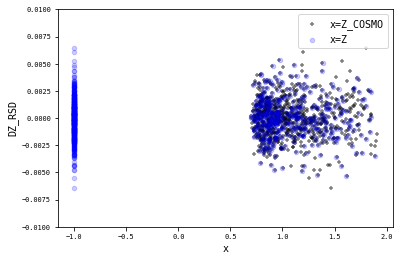

In [34]:
plt.scatter(data['Z_COSMO'][sample], data['DZ_RSD'][sample], 20, marker='+', color='k',
            label='x=Z_COSMO', alpha=0.5)
plt.scatter(data['Z'][sample],       data['DZ_RSD'][sample], 20, label='x=Z', 
            alpha=0.2, color='b')
plt.ylabel('DZ_RSD')
plt.legend()
plt.xlabel('x')
plt.ylim(-0.01, 0.01)

In [2]:
msample = np.zeros(data.size, '?')
msample[sample] = True

Text(0, 0.5, 'DZ_RSD')

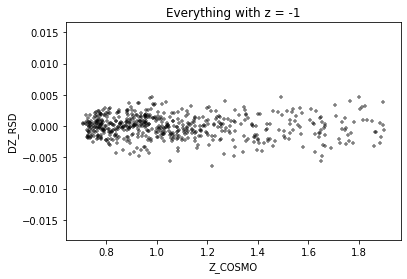

In [15]:
neg = (data['Z'] < 0) & msample
plt.title('Everything with z = -1')
plt.scatter(data['Z_COSMO'][neg], data['DZ_RSD'][neg], 20, marker='+', color='k', alpha=0.5)
plt.xlabel('Z_COSMO')
plt.ylabel('DZ_RSD')

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [7]:
plt.rc('font',  family='monospace')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [8]:
ls /home/mehdi/data/mocksys/

pk_v0_10_real_0_0.3.pdf  pk_v0_13_real_0_0.3.txt  pk_v0_15_red_0_0.3.txt
pk_v0_10_real_0_0.3.txt  pk_v0_13_real_1_0.3.pdf  pk_v0_15_red_0.txt
pk_v0_10_real_1_0.3.pdf  pk_v0_13_real_1_0.3.txt  pk_v0_15_red_1_0.2.txt
pk_v0_10_real_1_0.3.txt  pk_v0_13_red_0_0.3.pdf   pk_v0_15_red_1_0.3.pdf
pk_v0_10_red_0_0.3.pdf   pk_v0_13_red_0_0.3.txt   pk_v0_15_red_1_0.3.txt
pk_v0_10_red_0_0.3.txt   pk_v0_13_red_1_0.3.pdf   pk_v0_15_red_1.txt
pk_v0_10_red_1_0.3.pdf   pk_v0_13_red_1_0.3.txt   pk_v0_15.txt
pk_v0_10_red_1_0.3.txt   pk_v0_14_real_0_0.3.pdf  pk_v0_16_real_0_0.3.pdf
pk_v0_11_real_0_0.3.pdf  pk_v0_14_real_0_0.3.txt  pk_v0_16_real_0_0.3.txt
pk_v0_11_real_0_0.3.txt  pk_v0_14_real_1_0.3.pdf  pk_v0_16_real_1_0.3.pdf
pk_v0_11_real_1_0.3.pdf  pk_v0_14_real_1_0.3.txt  pk_v0_16_real_1_0.3.txt
pk_v0_11_real_1_0.3.txt  pk_v0_14_red_0_0.3.pdf   pk_v0_16_red_0_0.3.pdf
pk_v0_11_red_0_0.3.pdf   pk_v0_14_red_0_0.3.txt   pk_v0_16_red_0_0.3.txt
pk_v0_11_red_0_0.3.txt   pk_v0_14_red_1_0.3.pdf   pk_v0_16_red_1_

In [9]:
file = lambda i, r, s: np.loadtxt('/home/mehdi/data/mocksys/pk_v0_'+str(i)+'_'+r+'_'+str(s)+'_0.3.txt')

In [10]:
colors = {'real':'k', 'red':'r'}
ls = {0:'-', 1:'--'}

In [3]:
import nbodykit.cosmology as cosmology

In [14]:
redshift = 1.2
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift, transfer='CLASS')

In [12]:
b1 = 1.5

[Text(0, 0.5, 'kP$_{2}$/100'), Text(0.5, 0, 'k')]

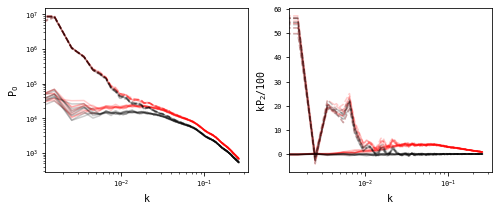

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 3), sharex=True)
fig.subplots_adjust(hspace=0.)
for r in ['red', 'real']:
    for i in [0, 1]:       
        for k in range(10, 18):
            kpk = file(k, r, i)
            ax[0].plot(kpk[:, 0], 
                     kpk[:, 1],
                     color=colors[r],
                     ls=ls[i], alpha=0.2)

            ax[1].plot(kpk[:, 0], 
                      kpk[:, 0]*kpk[:, 2]/100,
                      color=colors[r],
                      ls=ls[i], alpha=0.2)
#ax[0].plot(kpk[:,0], b1*b1*Plin(kpk[:,0]))
ax[0].set(ylabel=r'P$_{0}$', yscale='log', 
          xscale='log', xlabel='k')
ax[1].set(xlabel='k', ylabel=r'kP$_{2}$/100')
#plt.savefig('kpk.pdf')